In [1]:
def func(x):
    return 2*x**3 - 6*x**2 - 4*x + 1

def chord_method(x0, x1, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        f_x0 = func(x0)
        f_x1 = func(x1)
        
        if abs(f_x1 - f_x0) < tol:
            break
        
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        
        if func(x2) * f_x1 < 0:
            x0 = x1
        else:
            x1 = x2
        
        if abs(func(x2)) < tol:
            break
    
    return x2

x0 = -2
x1 = 0
root = chord_method(x0, x1)

print(f"Root found at x = {root}")


Root found at x = -0.7229691629671842


In [33]:
def func(x):
    return 2*x**3 - 6*x**2 - 4*x + 1

def bisection_method(a, b, tol=1e-6, max_iter=100):
    if func(a) * func(b) >= 0:
        raise ValueError("Начальные точки a и b должны обеспечивать f(a) * f(b) < 0.")
    
    for i in range(max_iter):
        c = (a + b) / 2.0
        f_c = func(c)
        
        if abs(f_c) < tol:
            break
        
        if func(c) * func(a) < 0:
            b = c
        else:
            a = c
    
    return c

a = -2
b = 0
root = bisection_method(a, b)

print(f"Корінь при x = {root}")


Корінь при x = -0.7229692935943604


Значення функції у точці x_test = -1.416


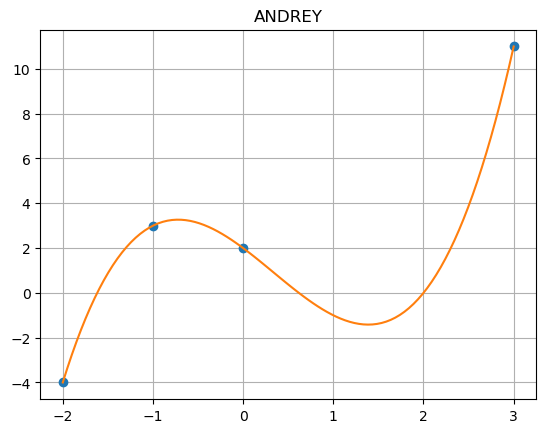

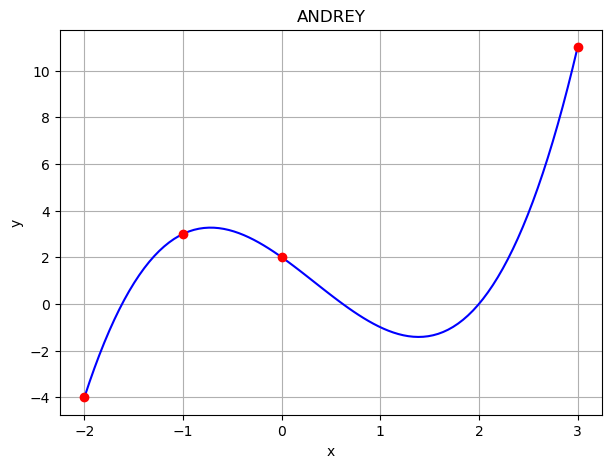

In [8]:
import numpy as np 

import matplotlib.pyplot as plt 

from scipy.interpolate import lagrange #

 

x=np.array([-2.,-1.,0.,3.], dtype=float) 

y=np.array([-4.,3., 2.,11.], dtype=float) 

x_test = 1.4 

 

def lagrange_interpolation(x, y, x_test): 

    n = len(x) 

    p = np.zeros(n) 

    for i in range(n): 


        p_i = 1 

        for j in range(n): 

            if i != j: 

                p_i *= (x_test - x[j])/(x[i] - x[j]) 

        p[i] = p_i 

    return np.dot(y, p) 

 



f_interp = lagrange_interpolation(x, y, x_test) 

 

print("Значення функції у точці x_test =", f_interp.round(4)) 
  

xnew=np.linspace(np.min(x),np.max(x),100) 

ynew=[lagrange_interpolation(x,y,i) for i in xnew] 

 

plt.plot(x,y,'o',xnew,ynew) 

plt.title('ANDREY') 

plt.grid(True) 

plt.show()    

 

#Перевірка  

f = lagrange(x, y) 

fig = plt.figure(figsize = (7,5)) 

plt.plot(xnew, f(xnew), 'b', x, y, 'ro') 

plt.title('ANDREY') 

plt.grid() 

plt.xlabel('x') 

plt.ylabel('y') 

plt.show() 

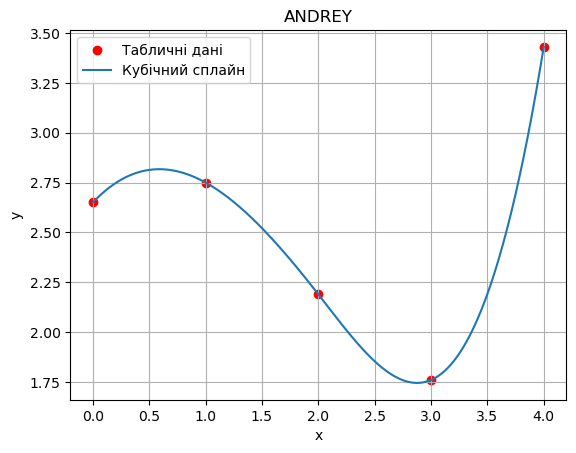

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

x = np.array([0, 1, 2, 3, 4])
y = np.array([2.65, 2.75, 2.19, 1.76, 3.43])

cs = CubicSpline(x, y)


x_vals = np.linspace(0, 4, 1000)
y_vals = cs(x_vals)


plt.scatter(x, y, color='red', label='Табличні дані')
plt.plot(x_vals, y_vals, label='Кубічний сплайн')
plt.title('ANDREY')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


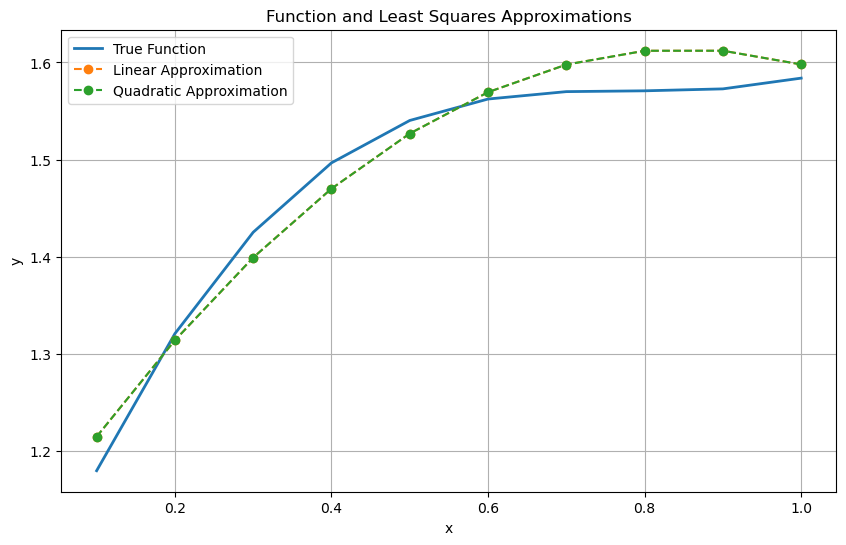

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

def true_function(x):
    return np.cos(2*x) + 2*x

def fit_function(params, x):
    a, b, c = params
    return a + b*x + c*x**2

x_values = np.arange(0.1, 1.1, 0.1)

y_values_true = true_function(x_values)
noise = np.random.normal(0, 0.1, len(x_values))
y_values_noisy = y_values_true + noise

initial_params = [1, 1, 1]

def fun(params, x, y):
    return fit_function(params, x) - y


result = least_squares(fun, initial_params, args=(x_values, y_values_noisy))

optimal_params = result.x

plt.figure(figsize=(10, 6))

plt.plot(x_values, y_values_true, label='True Function', linewidth=2)

approximation_line = fit_function(optimal_params, x_values)
plt.plot(x_values, approximation_line, label='Linear Approximation', linestyle='--', marker='o')

optimal_params_quad = [optimal_params[0], optimal_params[1], optimal_params[2]]
approximation_quad = fit_function(optimal_params_quad, x_values)
plt.plot(x_values, approximation_quad, label='Quadratic Approximation', linestyle='--', marker='o')

plt.title('Function and Least Squares Approximations')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
from scipy import integrate
import numpy as np

eps = 0.001
a = 0.8
b = 1.4

def f1(x):
    return 1 / np.sqrt(2 * x + 3)

def left_rec(f1, a, b, n):
    h = (b - a) / n
    s = 0
    for i in range(0, n):
        s += f1(a + i * h)
    return s * h

v, err = integrate.quad(f1, a, b)  # Перевірка

if abs(left_rec(f1, a, b, 2 * 10) - left_rec(f1, a, b, 10)) / 3.0 <= eps:
    print("left rectangle:", round(left_rec(f1, a, b, 10), 5))

def right_rec(f1, a, b, n):
    h = (b - a) / n
    s = 0
    for i in range(1, n + 1):
        s += f1(a + i * h)
    return s * h

print("right rectangle:", round(right_rec(f1, a, b, 10), 5))

def aver_rec(f1, a, b, n):
    h = (b - a) / n
    s = 0
    for i in range(0, n):
        s += f1(a + i * h + h / 2)
    return s * h

print("average rectangle:", round(aver_rec(f1, a, b, 10), 5))
print("Check for the rectangle method =", round(v, 5))


left rectangle: 0.2651
right rectangle: 0.26204
average rectangle: 0.26355
Check for the rectangle method = 0.26356


In [24]:
from scipy import integrate
import numpy as np
from math import sqrt, cos

def f(x):
    return sqrt(x) * cos(x**2)*1

a = 0.4
b = 1.2
n = 8

def simpson_rule(f, a, b, n):
    h = (b - a) / n
    integr = f(a) + f(b)

    for i in range(1, n):
        k = a + i * h
        if i % 2 == 0:
            integr += 2 * f(k)
        else:
            integr += 4 * f(k)

    integr *= h / 3
    return integr

integral1 = simpson_rule(f, a, b, n)
n *= 2
integral2 = simpson_rule(f, a, b, n)

while abs(integral2 - integral1) / 15 > 0.001:
    integral1 = integral2
    n *= 2
    integral2 = simpson_rule(f, a, b, n)

print("Simpson method:", round(integral2, 3))

v, err = integrate.quad(f, a, b)
print("Check for the Simpson method =", round(v, 3))


Simpson method: 0.484
Check for the Simpson method = 0.484


In [29]:
from scipy import integrate  
import numpy as np 

def f(x): 
    return 1 / np.sqrt(3*x**2 - 0.4) 

a = 1.3 
b = 2.1 
n = 20 

def trapezoidal_rule(f, a, b, n): 
    h = (b - a) / n 
    x = a 
    integral_sum = f(a) 

    for i in range(1, n): 
        x += h 
        integral_sum += 2 * f(x) 

    integral_sum += f(b) 
    integral = h / 2 * integral_sum 
    return integral 

integral1 = trapezoidal_rule(f, a, b, n) 
n *= 2 
integral2 = trapezoidal_rule(f, a, b, n) 

while abs(integral2 - integral1) / 3 > 0.001: 
    integral1 = integral2 
    n *= 2 
    integral2 = trapezoidal_rule(f, a, b, n) 
print("Trapezoidal method result:", round(integral2, 3)) 

v, err = integrate.quad(f, a, b) 
print("Check for the trapezoidal method =", round(v, 5))


Trapezoidal method result: 0.284
Check for the trapezoidal method = 0.28421
